In [9]:
import os
import shutil
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create directories for synthetic dataset
os.makedirs('synthetic_dataset/cats', exist_ok=True)
os.makedirs('synthetic_dataset/dogs', exist_ok=True)

# Create synthetic cat images (black squares)
for i in range(50):
    image = np.zeros((64, 64, 3), dtype=np.uint8)
    cv2.imwrite(f'synthetic_dataset/cats/cat_{i}.jpg', image)

# Create synthetic dog images (white squares)
for i in range(50):
    image = np.ones((64, 64, 3), dtype=np.uint8) * 255
    cv2.imwrite(f'synthetic_dataset/dogs/dog_{i}.jpg', image)

print("Synthetic dataset created.")


Synthetic dataset created.


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        cats       1.00      1.00      1.00        12
        dogs       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



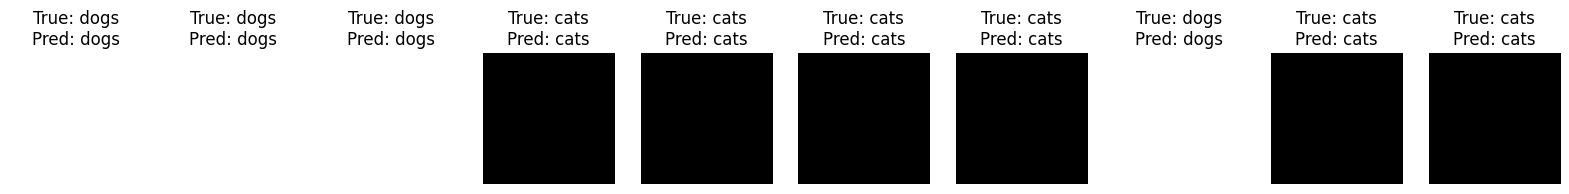

In [10]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Function to load images and labels
def load_images_and_labels(image_dir, image_size=(64, 64)):
    images = []
    labels = []
    for label in ['cats', 'dogs']:
        class_dir = os.path.join(image_dir, label)
        for filename in os.listdir(class_dir):
            file_path = os.path.join(class_dir, filename)
            image = cv2.imread(file_path)
            image = cv2.resize(image, image_size)
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load dataset
image_dir = 'synthetic_dataset'  # Path to the synthetic dataset
image_size = (64, 64)
X, y = load_images_and_labels(image_dir, image_size)

# Normalize pixel values
X = X / 255.0

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_flat, y_train)

# Make predictions
y_pred = svm.predict(X_test_flat)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Plot some predictions
def plot_predictions(images, true_labels, pred_labels, label_encoder, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        true_label = label_encoder.inverse_transform([true_labels[i]])[0]
        pred_label = label_encoder.inverse_transform([pred_labels[i]])[0]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis("off")
    plt.show()

plot_predictions(X_test, y_test, y_pred, le)
